## Iris Petal Classification with LinearRegression
## Learning ML - Case 1


In [ ]:
# Using iris dataset to predict the species of the flower depending on the width and height
# The 3 labels are Iris Setosa, Iris Virginica, Iris Versicolor

# Equation for logistic Regression
# y = mx+c 
# y = B0 + B1X + B2X

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# load ther iris dataset
iris = load_iris()
# here we can observe that we are getting 3 arrays in return called 'data','target','target_names'
# we must create a dataframe from that

In [4]:
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names']+['target'] )
df

# np.c_() is a numpy method that concatenates the data and target columns 
# columns argument just renames the columns 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [5]:
#converting target from float to int

df['target'] = df['target'].astype(int)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y = df['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size=0.2)

In [8]:
print(len(X_train), len(X_test))

120 30


In [9]:
model = LinearRegression()

In [52]:
model.fit(X_train, y_train)

LinearRegression()

In [53]:
pred1 = model.predict(X_test)
pred1

array([ 2.06844113,  0.96345869, -0.14707913,  1.81304847, -0.03927091,
        2.26261445, -0.02790835,  1.31919261,  1.28225236,  1.11236814,
        1.54774304,  1.3013147 ,  1.21150471,  1.32946956,  1.32977882,
       -0.12060477,  1.35574095,  1.21453128,  0.03610115, -0.02518356,
        1.79941543,  1.39427904,  0.07356109,  0.02146025,  1.59050985,
       -0.11917603,  0.14803648,  1.16645127,  0.90550234,  0.10586947])

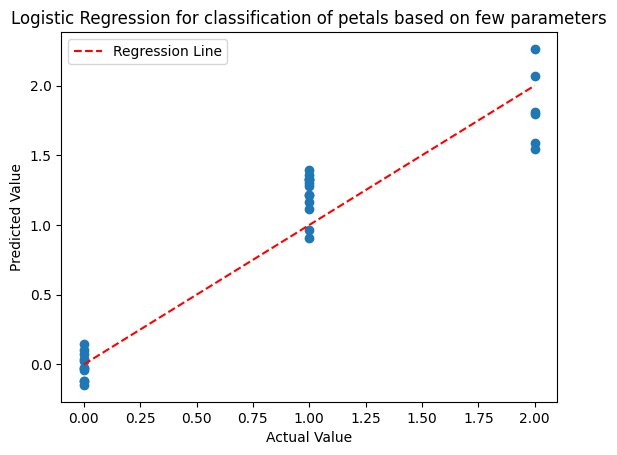

In [51]:
plt.scatter(y_test,pred1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Regression Line')
plt.legend()
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Logistic Regression for classification of petals based on few parameters')
plt.show()

In [13]:
# here we can see the predictions lie at 0,1,2... 
# hence we can use that as a reference and round the predicted values to make a confirmed decision

In [42]:
def map_to_species(label):
    if label >2:
        return 'Please check your parameters.'
    else:
        species_mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
        return species_mapping[label]
    
def prediction(sL, sW, pL, pW):
    features = np.array([[sL, sW, pL, pW]])
    predicted_species = model.predict(features)
    pred = int(predicted_species)
    return map_to_species(pred)

In [43]:
# Individual prediction based on the parameters

sL = float(input('Enter Sepal Length : '))
sW = float(input('Enter Sepal Width : '))
pL = float(input('Enter Petal Length : '))
pW = float(input('Enter Petal Width : '))

print('Predicted species : ',prediction(sL, sW, pL, pW))

Enter Sepal Length : 3
Enter Sepal Width : 4
Enter Petal Length : 6
Enter Petal Width : 3
Predicted species :  Virginica


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
